# Singly Linked List
Following
https://www.educative.io/module/data-structures-algorithms-in-python
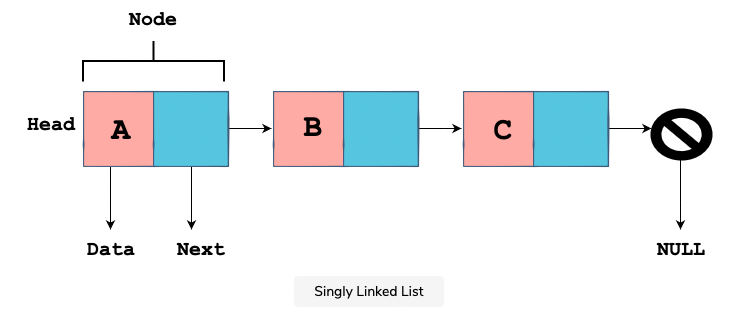
every node has two component:
1. Data (to store an element of data of any type)
2. Next (a pointer that points from one node to another)

The start of the linked list is referred to as the head. head is a pointer that points to the beginning of the linked list.

The last component of a singly linked list is a notion of null. This null idea terminates the linked list.(None in Python). The last node points to a null object.

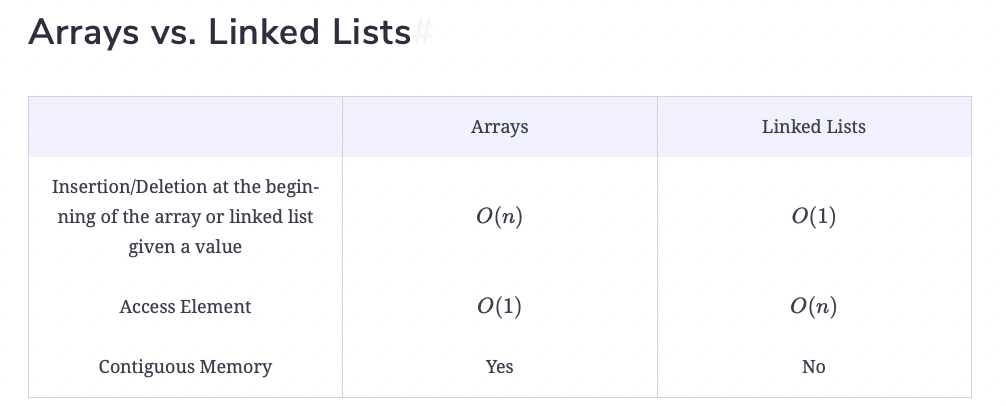

In [11]:
#Implementation
class Node:
    def __init__(self,data):
        self.data=data
        self.next=None
class LinkedList:
    def __init__(self):
        self.head=None
    
    def print_list(self):
        cur_node=self.head
        while cur_node:
            print(cur_node.data)
            cur_node=cur_node.next
    def append(self,data):
        """
        insert an element at the end of the linked list
        """
        new_node=Node(data)
        if self.head is None:
            self.head=new_node
            return
        last_node=self.head
        while last_node.next:
            last_node=last_node.next
        last_node.next=new_node
    def prepend(self,data):
        """
        insert at the beginning
        """
        new_node=Node(data)
        new_node.next=self.head
        self.head=new_node
        
    def insert_after_node(self,prev_node,data):
        if not prev_node:
            print("Previous node does not exist.")
            return
        new_node=Node(data)
        new_node.next=prev_node.next
        prev_node.next=new_node
    def delete_node(self,key):
        """
        delete based on data
        """
        cur_node=self.head
        #the node to be deleted is head
        if cur_node and cur_node.data==key:
            self.head=cur_node.next
            cur_node=None
            return
        #the node to be deleted is not head
        prev=None
        while cur_node and cur_node.data!=key:
            prev=cur_node
            cur_node=cur_node.next
        if cur_node is None:
            return
        prev.next=cur_node.next
        cur_node=None
        
    def delete_node_at_pos(self,pos):
        if self.head:#check is the list is empty or not
            cur_node=self.head
            if pos==0:
                self.head=cur_node.next #update head if the original head is to be deleted
                cur_node=None
                return
            prev=None
            count=0
            while cur_node and count!=pos:
                prev=cur_node
                cur_node=cur_node.next
                count+=1
            if cur_node is None:
                return
            prev.next=cur_node.next
            cur_node=None
    def len_iterative(self):
        """
        length of the linked list
        """
        count=0
        cur_node=self.head
        while cur_node:
            count+=1
            cur_node=cur_node.next
        return count
    def len_recursive(self,node):
        """
        to get the length of the whole list, head needs to be passed as the parameter
        """
        #base case: empty list
        if node is None:
            return 0
        return 1+self.len_recursive(node.next)
    def swap_nodes(self,key_1,key_2):
        if key_1==key_2:return
        prev_1=None
        curr_1 = self.head
        while curr_1 and curr_1.data!=key_1:
            prev_1=curr_1
            curr_1=curr_1.next
        prev_2 = None 
        curr_2 = self.head 
        while curr_2 and curr_2.data != key_2:
            prev_2 = curr_2 
            curr_2 = curr_2.next
        if not curr_1 or not curr_2:
            return
        if prev_1:
            prev_1.next=curr_2
        else:
            self.head=curr_2
        if prev_2:
            prev_2.next=curr_1
        else:
            self.head=curr_1
        curr_1.next, curr_2.next = curr_2.next, curr_1.next
    def reverse_iterative(self):
        prev=None
        cur=self.head
        while cur:
            nxt=cur.next
            cur.next=prev
            prev=cur
            cur=nxt
        self.head=prev
    def reverse_recursive(self):
        def _reverse_recursive(cur,prev):
            if not cur:
                return prev
            nxt=cur.next
            cur.next=prev
            prev=cur
            cur=nxt
            return _reverse_recursive(cur,prev)
        self.head=_reverse_recursive(cur=self.head,prev=None)
    def merge_sorted(self,l2):
        """
        merge two sorted linked list
        """           
        p=self.head
        q=l2.head
        prev=None
        if not p:
            return q
        if not q:
            return p
        while p and q:
            if p.data<=q.data:
                if prev:
                    prev.next=p
                prev=p
                p=p.next
            else:
                if prev:
                    prev.next=q
                prev=q
                q=q.next
        #one of the list has been finished
        if not p:
            prev.next=q
        if not q:
            prev.next=p
        #new head            
        if self.head.data>l2.head.data:
            self.head=l2.head
    def remove_duplicates(self):
        unique=set()
        cur=self.head
        prev=None
        while cur: 
            if cur.data in unique:
                prev.next=cur.next 
                cur=None #set it to none for better garbage collection
            else:
                unique.add(cur.data) 
                prev=cur 
            cur=prev.next
    def print_nth_from_last(self,n,method):
        if method==1:
            """
            traverse the list twice. 
            first time to get the total length in order to calculate index/ count
            """
            total_length=self.len_recursive(self.head)
            index=total_length+1-n
            count=1
            cur=self.head
            while cur and count<index:
                cur=cur.next
                count+=1
            if cur is None:
                return
            else:
                print(cur.data)
                return cur.data
        elif method==2:
            """
            only traverse the list once
            """
            p=self.head
            q=self.head
            if n>0:
                count=0
                while q:
                    count+=1
                    if count==n:
                        break
                    q=q.next
                if not q:
                    print(str(n) + " is greater than the number of nodes in list.")
                    return
                while p and q.next:
                    p=p.next
                    q=q.next
            else: 
                return None
    def rotate(self,k):
        if self.head and self.head.next:
        #only rotate a linked list if it’s not empty or contains more than one element
            p=self.head
            count=1
            end=self.head
        while end.next:
            if count<k:
                p=p.next
                count+=1
            end=end.next
        end.next=self.head
        self.head=p.next
        p.next=None
    def is_palindrome(self):
        # Solution 1:
        s = ""
        p = self.head 
        while p:
            s += p.data
            p = p.next
        return s == s[::-1]
    def is_palindrome(self):
        # Solution 2:
        p = self.head
        s = []
        while p:
            s.append(p.data)
            p = p.next
        p = self.head
        while p:
            data = s.pop()
            if p.data != data:
                return False
            p = p.next
        return True
    def is_palindrome(self):
        if self.head:
            p = self.head 
            q = self.head 
            prev = []
    
            i = 0
            while q:
                prev.append(q)
                q = q.next
                i += 1
            q = prev[i-1]

            count = 1

            while count <= i//2 + 1:
                if prev[-count].data != p.data:
                    return False
                p = p.next
                count += 1
            return True
         else:
            return True
    def move_tail_to_head(self):
        if self.head and self.head.next:
            p=self.head
            prev=None
            while p.next:
                prev=p
                p=p.next
            prev.next=None
            p.next=self.head
            self.head=pc
            
llist = LinkedList()
llist.append("A")
llist.append("B")
llist.append("B")
llist.append("A")

print("Original List")
llist.print_list()

print(llist.is_palindrome())
#print(llist.print_nth_from_last(4))
#print("Linked List After Removing Duplicates")
#llist.remove_duplicates()
#llist.print_list()

#llist.insert_after_node(llist.head.next, "D")
#llist.delete_node("B")
#llist.delete_node_at_pos(1)

# llist.swap_nodes("B", "C")
# print("Swapping nodes B and C that are not head nodes")
# llist.print_list()

# llist.swap_nodes("A", "B")
# print("Swapping nodes A and B where key_1 is head node")
# llist.print_list()

# llist.swap_nodes("D", "B")
# print("Swapping nodes D and B where key_2 is head node")
# llist.print_list()

# llist.swap_nodes("C", "C")
# print("Swapping nodes C and C where both keys are same")
# llist.print_list()

#llist.reverse_iterative()
#llist.reverse_recursive()
#print("reverse")
#llist.print_list()

Original List
A
B
B
A
True


In [7]:
def is_palindrome(self):
    # Solution 2:
    p = self.head
    s = []
    while p:
        s.append(p.data)
        p = p.next
    p = self.head
    while p:
        data = s.pop()
        if p.data != data:
            return False
        p = p.next
    return True

It is common to store explicit reference to the tail node, and a count of the total number of nodes to avoid the need to traverse.

It is better to implement stack using singly linked list compared to using array

## Circular Linked list
the next of the tail node is the head node instead of Null
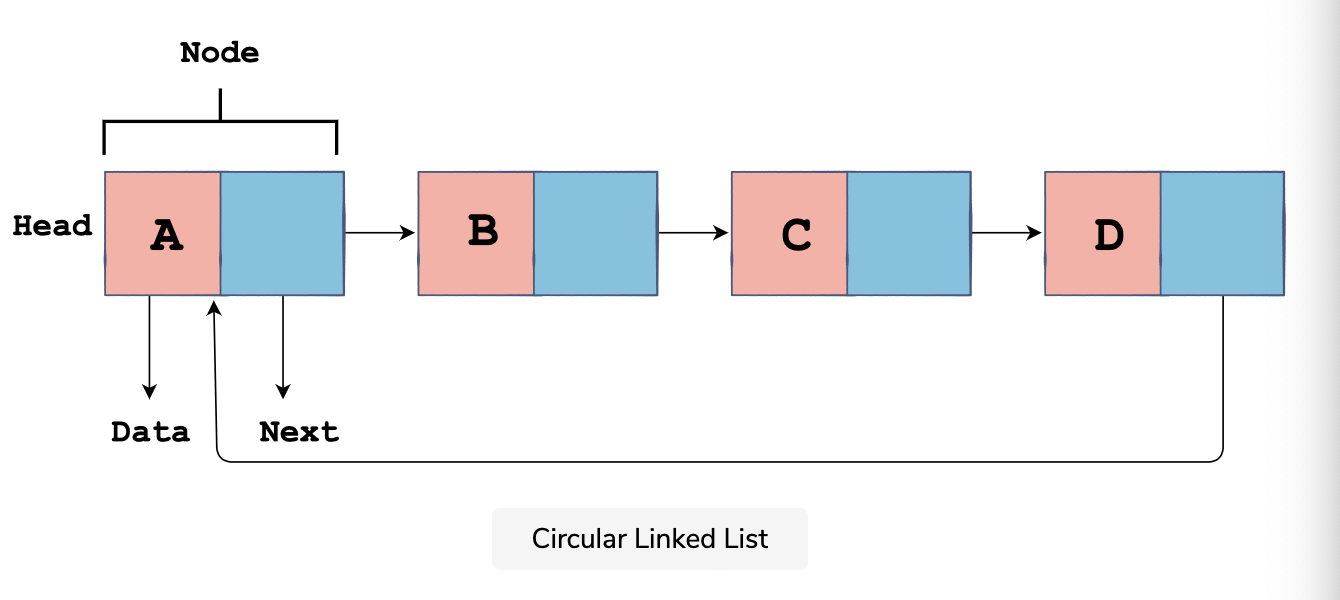

In [1]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None


class CircularLinkedList:
    def __init__(self):
        self.head = None
        
    def __len__(self):
        count=0
        cur=self.head
        while cur:
            count+=1
            cur=cur.next
            if cur==self.head:
                break
        return count
    
    def print_list(self):
        cur=self.head
        while cur:
            print(cur.data)
            cur=cur.next
            if cur==self.head:
                break
            
    def prepend(self, data):
        """
        make it the head of the linked list
        """
        new=Node(data)
        new.next=self.head
        if not self.head:
            self.head.next=self.head
        else:
            cur=self.head
            while cur.next!=self.head:
                cur=cur.next
            cur.next=new 
        self.head=new

    def append(self, data):
        """
        insert new node after the node that was previously pointing to the head
        """
        if not self.head:
            self.head=Node(data)
            self.head.next=self.head
        else:
            new=Node(data)
            cur=self.head
            while cur.next!=self.head:
                cur=cur.next
            cur.next=new
            new.next=self.head
    def remove(self, key):
        """
        Assume no duplicates.
        """
        if self.head:
            if self.head.data == key:
                cur = self.head 
                while cur.next != self.head:
                    cur = cur.next 
                if self.head == self.head.next:
                    self.head = None
                else:
                    cur.next = self.head.next
                    self.head = self.head.next
        else:
            cur = self.head 
            prev = None 
            while cur.next != self.head:
                prev = cur 
                cur = cur.next
                if cur.data == key:
                    prev.next = cur.next 
                    cur = cur.next
    def split_list(self):
        size=len(self)
        if size==0: return None
        if size==1: return self.head
        mid=size//2
        halfcount=0
        cur=self.head
        prev=None

        while halfcount<mid:
            halfcount+=1
            prev=cur
            cur=cur.next
        prev.next=self.head
        
        split_cllist=CircularLinkedList()
        while cur!=self.head:
            split_cllist.append(cur.data)
            cur=cur.next

        self.print_list()
        print('\n')
        split_cllist.print_list()
    def remove_node(self, node):
        if self.head == node:
            cur = self.head 
            while cur.next != self.head:
                cur = cur.next
            if self.head == self.head.next:
                self.head = None
            else:
                cur.next = self.head.next 
                self.head = self.head.next
        else:
            cur = self.head 
            prev = None
            while cur.next != self.head:
                prev = cur 
                cur = cur.next 
                if cur == node:
                    prev.next = cur.next
                    cur = cur.next
    def josephus_circle(self, step):
        cur = self.head 
        length = len(self)
        if length<step: return False
        while self.head!= self.head.next:
            count = 1 
            while count != step:
                cur = cur.next 
                count += 1
            print("KILL:" + str(cur.data))
            self.remove_node(cur)
            cur = cur.next
            length -= 1
    def is_circular_linked_list(self, input_list):
        if input_list.head:
            cur = input_list.head
            while cur.next:
                cur = cur.next
                if cur.next == input_list.head:
                    return True
            return False
        else:
            return False
        

cllist = CircularLinkedList()
cllist.append(1)
cllist.append(2)
cllist.append(3)
cllist.append(4)


cllist.josephus_circle(2)
cllist.print_list()

KILL:2
KILL:4
KILL:3
1


## Circular Queue

In [ ]:
class Empty(Exception):
    pass
class CircularQueue:
    class _Node:
        __slots__='_element','_next'
        def __init__(self,element,next_):
            self._element=element
            self._next=next_
    def __init__(self):
        self._tail=None
        self._size=0
    def __len__(self):
        return self._size
    def is_empty(self):
        return self._size==0
    def first(self):
        """
        Return (but do not move)the element at the front of the queue
        """
        is self.is_empty():
            raise Empty("Queue is empty")
        head=self._tail._next
        return head._element
    def dequeue(self):
        """
        Remove and return the first element of the queue
        """
        if self.is_empty():
            raise Empty('Queue is empty')
        oldhead=self._size._next
        if self._size==1:
            self._tail=None
        else:
            self._tail._next=oldhead._next
        self._size-=1
        return oldhead._element
    def enqueue(self,e):
        """
        Add an element to the back of queue
        """
        new=Node(e,None)
        if self.is_empty():
            new._next=new
        else:
            new._next=self._tail._next
            self._tail._next=new
        self._tail=new
        self._size+=1
    def rotate(self):
        """
        Rotate front element to the back of the queue
        """
        if self._size>0:
            self._tail=self._tail._next #old head becomes new tail